<a href="https://colab.research.google.com/github/akshaytheau/Data-Science/blob/master/Fruit_detection_using_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Importing modules 
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import cv2

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from tensorflow.keras.models import Sequential

from sklearn.model_selection import train_test_split

np.random.seed(1)

In [7]:
! pwd

/content


In [8]:
train_images = []       
train_labels = []
shape = (200,200)  
train_path = 'sample_data/train'

for filename in os.listdir(train_path):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(train_path,filename))
        
        train_labels.append(filename.split('_')[0])
        
        img = cv2.resize(img,shape)
        
        train_images.append(img)

train_labels = pd.get_dummies(train_labels).values

train_images = np.array(train_images)

x_train,x_val,y_train,y_val = train_test_split(train_images,train_labels,random_state=1)

In [9]:
test_images = []
test_labels = []
shape = (200,200)
test_path = 'sample_data/test'

for filename in os.listdir('sample_data/test'):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(test_path,filename))
        
        test_labels.append(filename.split('_')[0])
        
        img = cv2.resize(img,shape)
        
        test_images.append(img)
        
test_images = np.array(test_images)

[0 1 0 0]


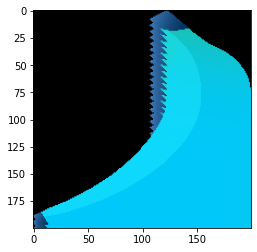

In [10]:
print(train_labels[0])
plt.imshow(train_images[0])

[1 0 0 0]


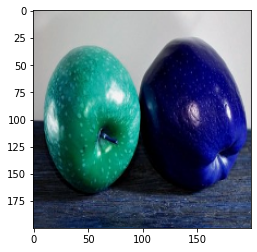

In [11]:
print(train_labels[4])
plt.imshow(train_images[4])

In [12]:
# Creating a Sequential model
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=(200,200,3,)))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))

model.add(Flatten())

model.add(Dense(20,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(4,activation = 'softmax'))
    
model.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )

In [13]:
# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 196, 196, 30)      8670      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 98, 98, 30)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 96, 30)        8130      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 30)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 46, 46, 30)        8

In [14]:
# Training the model
history = model.fit(x_train,y_train,epochs=50,batch_size=50,validation_data=(x_val,y_val))

Epoch 1/50
4/4 [==============================] - 24s 5s/step - loss: 5.5370 - acc: 0.2111 - val_loss: 3.5260 - val_acc: 0.2500
Epoch 2/50
4/4 [==============================] - 22s 5s/step - loss: 5.5649 - acc: 0.3111 - val_loss: 8.5947 - val_acc: 0.2500
Epoch 3/50
4/4 [==============================] - 22s 5s/step - loss: 5.9594 - acc: 0.3556 - val_loss: 2.4313 - val_acc: 0.3833
Epoch 4/50
4/4 [==============================] - 22s 5s/step - loss: 1.9252 - acc: 0.4000 - val_loss: 1.8975 - val_acc: 0.4000
Epoch 5/50
4/4 [==============================] - 22s 5s/step - loss: 2.7207 - acc: 0.3111 - val_loss: 3.6600 - val_acc: 0.4833
Epoch 6/50
4/4 [==============================] - 22s 5s/step - loss: 2.8644 - acc: 0.4000 - val_loss: 3.0858 - val_acc: 0.4833
Epoch 7/50
4/4 [==============================] - 22s 5s/step - loss: 2.5718 - acc: 0.4889 - val_loss: 2.6975 - val_acc: 0.4667
Epoch 8/50
4/4 [==============================] - 22s 5s/step - loss: 1.9862 - acc: 0.6333 - val_loss: 2

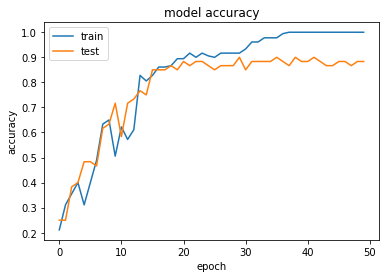

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

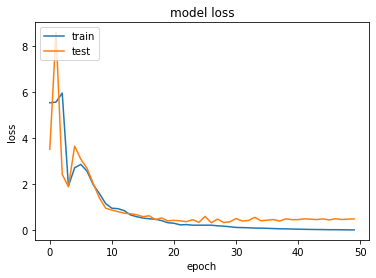

In [16]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
evaluate = model.evaluate(x_val,y_val)
print(evaluate)

2/2 [==============================] - 2s 803ms/step - loss: 0.5016 - acc: 0.8833
[0.5016170740127563, 0.8833333253860474]


In [18]:
# Testing predictions and the actual label
checkImage = test_images[0:1]
checklabel = test_labels[0:1]

predict = model.predict(np.array(checkImage))

output = { 0:'apple',1:'banana',2:'mixed',3:'orange'}

print("Actual :- ",checklabel)
print("Predicted :- ",output[np.argmax(predict)])

Actual :-  ['mixed']
Predicted :-  mixed
